In [105]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Classification

In [106]:
fmnist_data = keras.datasets.fashion_mnist

In [107]:
(x_train, y_train), (x_test, y_test) = fmnist_data.load_data()

In [108]:
x_train.shape

(60000, 28, 28)

In [109]:
x_test.shape

(10000, 28, 28)

In [110]:
y_train.shape

(60000,)

In [111]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

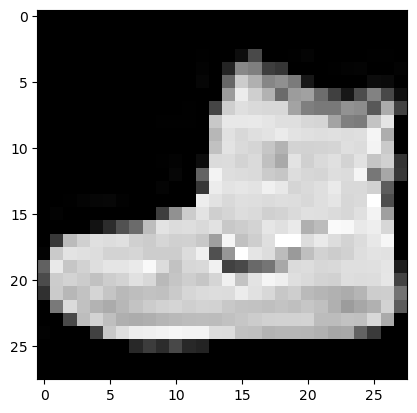

In [112]:
plt.imshow(x_train[0,], cmap="gray")

In [113]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define Model

In [114]:
init_1 = keras.initializers.VarianceScaling(scale=2.0, mode='fan_avg', distribution='uniform')

In [115]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    # keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal" ),
    keras.layers.Dense(100, kernel_initializer=init_1, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.Dense(10, activation="softmax")
])

/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/saeed/repositories/machine-learning/tensorflow-course/start-tensorflow/envs/lib/python3.11/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [116]:
model.layers

[<Flatten name=flatten_2, built=True>,
 <BatchNormalization name=batch_normalization_6, built=True>,
 <Dense name=dense_8, built=True>,
 <BatchNormalization name=batch_normalization_7, built=True>,
 <Activation name=activation_2, built=True>,
 <Dense name=dense_9, built=True>,
 <BatchNormalization name=batch_normalization_8, built=True>,
 <LeakyReLU name=leaky_re_lu_2, built=True>,
 <Dense name=dense_10, built=True>]

In [117]:
weights = model.layers[1].get_weights()

In [118]:
weights

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

# Compile Model

In [119]:
sgd = keras.optimizers.SGD(clipvalue=1.0)

In [120]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

# Fit Model

In [121]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    validation_split=0.15,
                    )

Epoch 1/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7075 - loss: 0.8900 - val_accuracy: 0.8249 - val_loss: 0.4878
Epoch 2/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8277 - loss: 0.4937 - val_accuracy: 0.8396 - val_loss: 0.4379
Epoch 3/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8407 - loss: 0.4505 - val_accuracy: 0.8479 - val_loss: 0.4160
Epoch 4/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8495 - loss: 0.4208 - val_accuracy: 0.8536 - val_loss: 0.3989
Epoch 5/5
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8541 - loss: 0.4078 - val_accuracy: 0.8610 - val_loss: 0.3871


In [122]:
history.history

{'accuracy': [0.7739607691764832,
  0.8275294303894043,
  0.8417450785636902,
  0.8491568565368652,
  0.8551176190376282],
 'loss': [0.6725971102714539,
  0.48968183994293213,
  0.44852903485298157,
  0.4221431016921997,
  0.4057096838951111],
 'val_accuracy': [0.8248888850212097,
  0.839555561542511,
  0.8478888869285583,
  0.8535555601119995,
  0.8610000014305115],
 'val_loss': [0.48780903220176697,
  0.43786996603012085,
  0.41601046919822693,
  0.3989492952823639,
  0.3870571553707123]}

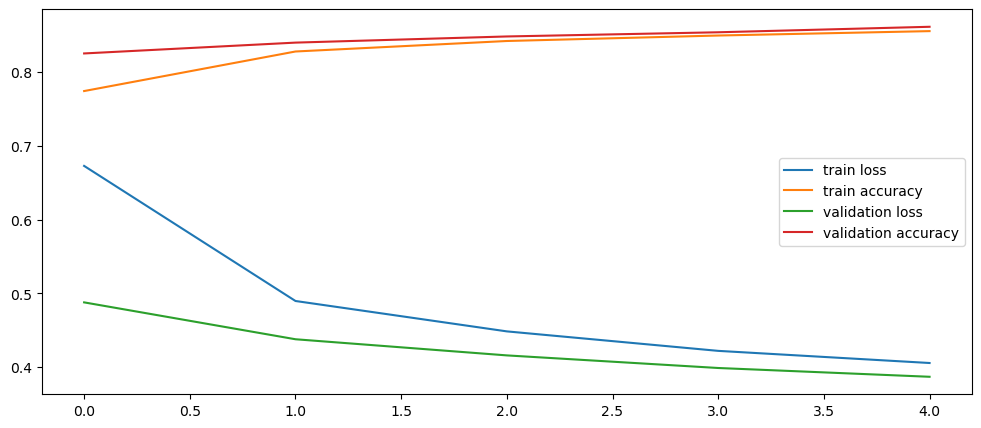

In [123]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(history.history["loss"], label="train loss")
ax.plot(history.history["accuracy"], label="train accuracy")
ax.plot(history.history["val_loss"], label="validation loss")
ax.plot(history.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [124]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 75)             │         7,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 75)             │           300 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 90,498 (353.51 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

 Optimizer params: 2 (12.00 B)

# Save Model

In [125]:
model.save("model0.keras")
model0 = keras.models.load_model("model0.keras")

In [126]:
model0.get_weights()[4]

array([[-0.03426635, -0.10491041,  0.04341344, ...,  0.08328009,
        -0.03426929, -0.09357178],
       [ 0.10562228, -0.0866486 ,  0.05967727, ..., -0.03518725,
        -0.00073612, -0.04438005],
       [-0.01357868,  0.05592033,  0.03357912, ...,  0.10393659,
        -0.00175201,  0.02520028],
       ...,
       [-0.0190882 ,  0.07139061,  0.08356376, ...,  0.05073922,
        -0.06342059, -0.09450295],
       [ 0.01761719, -0.09108724, -0.11270054, ..., -0.08309301,
         0.00659333, -0.01099047],
       [ 0.0559145 , -0.03418993,  0.03117185, ..., -0.01958078,
         0.07067769,  0.01683013]], dtype=float32)

In [127]:
model0_cloned = keras.models.clone_model(model0)

In [128]:
model0_cloned.set_weights(model0_cloned.get_weights())

In [129]:
model0.get_weights()[4]

array([[-0.03426635, -0.10491041,  0.04341344, ...,  0.08328009,
        -0.03426929, -0.09357178],
       [ 0.10562228, -0.0866486 ,  0.05967727, ..., -0.03518725,
        -0.00073612, -0.04438005],
       [-0.01357868,  0.05592033,  0.03357912, ...,  0.10393659,
        -0.00175201,  0.02520028],
       ...,
       [-0.0190882 ,  0.07139061,  0.08356376, ...,  0.05073922,
        -0.06342059, -0.09450295],
       [ 0.01761719, -0.09108724, -0.11270054, ..., -0.08309301,
         0.00659333, -0.01099047],
       [ 0.0559145 , -0.03418993,  0.03117185, ..., -0.01958078,
         0.07067769,  0.01683013]], dtype=float32)

In [130]:
model0.layers

[<Flatten name=flatten_2, built=True>,
 <BatchNormalization name=batch_normalization_6, built=True>,
 <Dense name=dense_8, built=True>,
 <BatchNormalization name=batch_normalization_7, built=True>,
 <Activation name=activation_2, built=True>,
 <Dense name=dense_9, built=True>,
 <BatchNormalization name=batch_normalization_8, built=True>,
 <LeakyReLU name=leaky_re_lu_2, built=True>,
 <Dense name=dense_10, built=True>]

In [131]:
model0.layers[4].trainable

True

In [132]:
model1 = keras.models.Sequential([model0.layers[-1]])

In [133]:
model1.add(keras.layers.Dense(1, activation="sigmoid"))

In [134]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 760 (2.97 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
for layer in model1.layers:
    print(layer.trainable)

True
True


In [136]:
for layer in model1.layers[:-1]:
    layer.trainable = False
    print(layer.trainable)

False


In [137]:
model1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760 (2.97 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 760 (2.97 KB)

In [138]:
X_train = x_train[:100]

In [139]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [140]:
X_train_new = X_train[:5000, :, :]

In [141]:
Y_train_new = np.where(y_train == 9, 1, 0)[:5000]

In [142]:
np.sum(y_train_new)

np.int64(506)

# Compile Model

In [145]:
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fit Model

In [144]:
model1.fit(X_train_new, Y_train_new, epochs=5, validation_split=0.15)

Epoch 1/5


ValueError: Input 0 of layer "dense_10" is incompatible with the layer: expected axis -1 of input shape to have value 75, but received input with shape (None, 28, 28)